# *Python* para *Data Science*

## Carregar pacotes

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Carregar dados

- arquivos ".csv"

In [ ]:
df_dados_paises = pd.read_csv('dados_1997_2011_paises_csv.csv', 
                              sep = ';', 
                              encoding='latin1', 
                              decimal=',')

In [ ]:
df_dados_paises.head()

,pais,ano,idh,corrupcao_indice,competitividade_indice,globalizacao_indice,pib,populacao
0,África do Sul,1997,0.6328,56,44.54,52.60298,148814151.0,43353.632
1,África do Sul,1998,0.6272,57,31.11,54.51911,134295557.0,43961.924
2,África do Sul,1999,0.6216,50,43.90,61.04379,133183581.0,44526.272
3,África do Sul,2000,0.6160,52,51.52,62.47182,132877648.0,45064.098
4,África do Sul,2001,0.6126,50,45.12,62.04144,118478979.0,45576.215


In [ ]:
# saber se dado eh um pandas dataframe
# isinstance(df_dados_paises, pd.DataFrame)

## Análises

- Adicionar/modificar colunas

In [ ]:
df_dados_paises['ln_pop'] = df_dados_paises['populacao'].apply(lambda x: np.log(x))

- Selecionar colunas

In [ ]:
df_dados_paises[['pais', 'ano', 'idh']].head()

,pais,ano,idh
0,África do Sul,1997,0.6328
1,África do Sul,1998,0.6272
2,África do Sul,1999,0.6216
3,África do Sul,2000,0.6160
4,África do Sul,2001,0.6126


- Filtrar linha de dados

In [ ]:
df_dados_paises[df_dados_paises['ano'] == 2010].head()

,pais,ano,idh,corrupcao_indice,competitividade_indice,globalizacao_indice,pib,populacao,ln_pop
13,África do Sul,2010,0.615,49,54.09,65.60,3.637039e+08,49109.10700,10.801800
28,Alemanha,2010,0.903,79,82.73,84.16,3.280530e+09,81906.32178,11.313331
43,Austrália,2010,0.927,87,92.17,83.82,1.131623e+09,21515.44693,9.976526
58,Bélgica,2010,0.885,73,73.59,92.95,4.693742e+08,10423.49300,9.251817
73,Brasil,2010,0.715,35,56.53,60.38,2.087900e+09,201103.25150,12.211574


- Sumarizar dados

In [ ]:
df_dados_paises.agg(idh_total_medio = pd.NamedAgg(column = 'idh', aggfunc = sum))

,idh
idh_total_medio,227.9572


- Ordenar dados

In [ ]:
df_dados_paises.sort_values('ano', ascending=True).head()

,pais,ano,idh,corrupcao_indice,competitividade_indice,globalizacao_indice,pib,populacao,ln_pop
0,África do Sul,1997,0.6328,56,44.54,52.60298,1.488142e+08,43353.63200,10.677146
225,Japão,1997,0.8572,67,70.51,59.37612,2.594566e+06,125924.56200,11.743438
180,Holanda,1997,0.8724,87,80.31,88.54621,3.117163e+05,15607.15025,9.655484
105,Cingapura,1997,0.7404,93,90.24,85.63774,1.045617e+08,3769.76000,8.234767
45,Bélgica,1997,0.8628,69,65.42,91.74219,2.497663e+08,10199.78700,9.230122


- Pivot: extender os dados em chave e valor

In [ ]:
df_dados_paises.pivot(index = 'ano', columns = 'pais', values = 'idh').head()

pais,Alemanha,Austrália,Brasil,Bélgica,Canadá,China,Cingapura,Coréia,Espanha,Estados Unidos,França,Holanda,Itália,Japão,México,Reino Unido,Rússia,África do Sul,Índia
ano,,,,,,,,,,,,,,,,,,,
1997,0.8466,0.8958,0.6464,0.8628,0.8736,0.5598,0.7404,0.8078,0.8162,0.8886,0.8298,0.8724,0.8070,0.8572,0.6916,0.8228,0.6814,0.6328,0.4466
1998,0.8524,0.8992,0.6526,0.8672,0.8754,0.5692,0.7606,0.8152,0.8238,0.8914,0.8352,0.8756,0.8130,0.8608,0.7004,0.8262,0.6846,0.6272,0.4514
1999,0.8582,0.9026,0.6588,0.8716,0.8772,0.5786,0.7808,0.8226,0.8314,0.8942,0.8406,0.8788,0.8190,0.8644,0.7092,0.8296,0.6878,0.6216,0.4562
2000,0.8640,0.9060,0.6650,0.8760,0.8790,0.5880,0.8010,0.8300,0.8390,0.8970,0.8460,0.8820,0.8250,0.8680,0.7180,0.8330,0.6910,0.6160,0.4610
2001,0.8702,0.9084,0.6704,0.8754,0.8816,0.5970,0.8078,0.8372,0.8426,0.8980,0.8506,0.8836,0.8322,0.8716,0.7226,0.8374,0.6978,0.6126,0.4696


- Melt: selecionar colunas e agrupar

In [ ]:
pd.melt(df_dados_paises, id_vars=['pais', 'ano'], var_name = 'indicadores', value_name = 'indices')

,pais,ano,indicadores,indices
0,África do Sul,1997,idh,0.632800
1,África do Sul,1998,idh,0.627200
2,África do Sul,1999,idh,0.621600
3,África do Sul,2000,idh,0.616000
4,África do Sul,2001,idh,0.612600
...,...,...,...,...
1990,Reino Unido,2007,ln_pop,11.024145
1991,Reino Unido,2008,ln_pop,11.030546
1992,Reino Unido,2009,ln_pop,11.036276
1993,Reino Unido,2010,ln_pop,11.041932


- Concatenar valores das colunas

In [ ]:
df_dados_paises['pais'] + '_' + df_dados_paises['ano'].astype(str)

0      África do Sul_1997
1      África do Sul_1998
2      África do Sul_1999
3      África do Sul_2000
4      África do Sul_2001
              ...        
280      Reino Unido_2007
281      Reino Unido_2008
282      Reino Unido_2009
283      Reino Unido_2010
284      Reino Unido_2011
Length: 285, dtype: object

In [ ]:
df_dados_paises['pais'].str.cat(df_dados_paises['ano'].astype(str), sep="_")

0      África do Sul_1997
1      África do Sul_1998
2      África do Sul_1999
3      África do Sul_2000
4      África do Sul_2001
              ...        
280      Reino Unido_2007
281      Reino Unido_2008
282      Reino Unido_2009
283      Reino Unido_2010
284      Reino Unido_2011
Name: pais, Length: 285, dtype: object

- Gráficos

gráfico de barras

In [ ]:
dados_2010 = df_dados_paises[df_dados_paises['ano'] == 2010]

Text(0.5, 1.0, 'Corrupção por país')

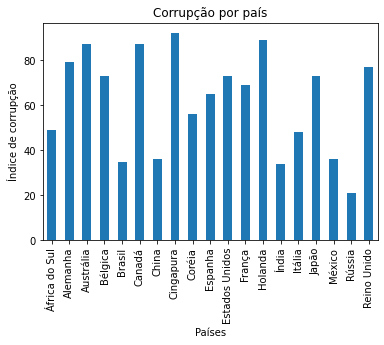

In [ ]:
ax = dados_2010.plot.bar(x = 'pais', y = 'corrupcao_indice', legend = None)
plt.xlabel("Países")
plt.ylabel("Índice de corrupção")
plt.title('Corrupção por país')

gráfico de linhas

In [ ]:
dados_brasil = df_dados_paises[df_dados_paises['pais'] == 'Brasil']

Text(0.5, 1.0, 'IDH Brasil')

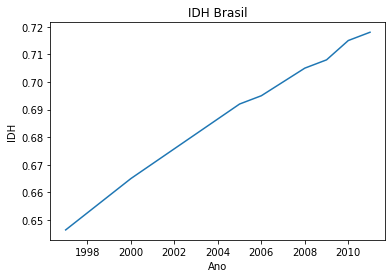

In [ ]:
ax = dados_brasil.plot.line(x = 'ano', y = 'idh', legend = None)
plt.xlabel("Ano")
plt.ylabel("IDH")
plt.title('IDH Brasil')